In [27]:
import matplotlib.pyplot as plt
import pandas as pd
#plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]
fs = 15
legend_fs = 11

folder = 'const-wind-negative/'

In [33]:
sdata = pd.read_csv(folder + 'polar-data2d.csv')
cdata = pd.read_csv(folder + 'cart-data2d.csv')

sdata['V_rel_block'] = sdata.apply(lambda row: row.V_block_fin - row.Wind_x, axis=1)
cdata['V_rel_block'] = cdata.apply(lambda row: row.V_block_fin - row.Wind_x, axis=1)

time = cdata['TotTime'].max()

cdata.head(4)

,Iter,TotTime,m_block,Alpha,Theta0,Theta_fin,V_theta_fin,V_block_fin,Wind_x,Wind_y,...,F_vinc,Tension,Lift,Liftz,Liftz.1,Drag,Dragx,Dragz,Stability,V_rel_block
0,42318,4.23,100.0,-8.0,2.36,0.0,0.0,0.0,-1.0,0.0,...,981.0,-83.82,-88.07,87.84,6.36,2.94,-0.21,2.93,0,1.0
1,62472,6.25,100.0,-8.0,2.36,0.0,0.0,0.0,-3.0,0.0,...,981.0,-18.77,-22.04,19.86,9.54,0.73,-0.32,0.66,0,3.0
2,814666,81.47,100.0,-8.0,2.36,0.0,0.0,0.0,-5.0,0.0,...,981.0,0.38,-11.48,0.00,11.48,0.38,-0.38,0.00,0,5.0
3,621512,62.15,100.0,-8.0,2.36,0.0,0.0,0.0,-7.0,0.0,...,981.0,0.75,-22.51,0.00,-22.51,0.75,-0.75,-0.00,0,7.0


## 1) Block velocities as a function of the attack angle for various wind velocities

In [34]:
wmin = -11
wmax = -41
step = -2

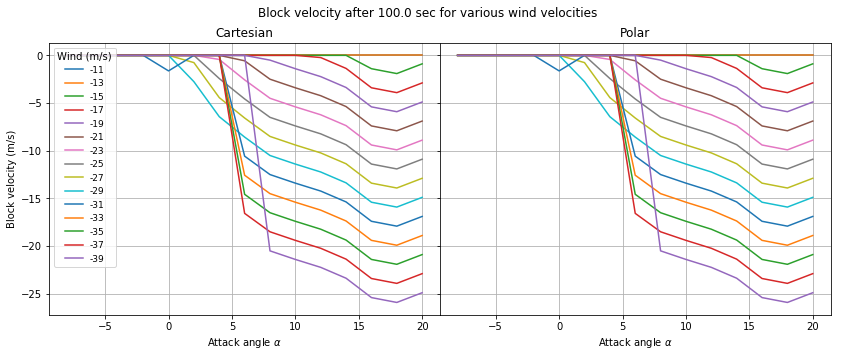

In [35]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax, step): 
    
    fig.suptitle("Block velocity after " + str(time) + " sec for various wind velocities")
    
    wdf = cdata.loc[cdata['Wind_x'] == float(w)]
    axs[0].plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    plt.grid(b=True)
    
    wdf = sdata.loc[sdata['Wind_x'] == float(w)]
    wdf.head(2)
    axs[1].plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel('Block velocity (m/s)')
    #axs[0].set_xlim(0,20)
    
    axs[0].set_title("Cartesian")
    axs[1].set_title("Polar")
    
for ax in axs.flat:
    ax.set(xlabel='Attack angle ' + r'$\alpha$')
    
#plt.savefig('Images/vblock_alpha_negative_pi4.png')

###  a) Cartesian coordinates

for w in range(wmin, wmax, step): 
    wdf = cdata.loc[cdata['Wind_x'] == float(w)]
    plt.plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    plt.ylabel('Block velocity (m/s)', fontsize=fs)
    plt.xlabel('Attack angle ' + r'$\alpha$', fontsize=fs)
    plt.title("Block velocity after 300 sec for various wind velocities")
    plt.legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left')
    plt.grid(b=True)

###  b) Polar coordinates

for w in range(wmin, wmax, step): 
    wdf = sdata.loc[cdata['Wind_x'] == float(w)]
    plt.plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    plt.ylabel('Block velocity (m/s)', fontsize=fs)
    plt.xlabel('Attack angle ' + r'$\alpha$', fontsize=fs)
    plt.title("Block velocity after 300 sec for various wind velocities")
    plt.legend(title = 'Wind (m/s)', fontsize = legend_fs, loc='upper left')
    plt.grid(b=True)

## 2) Kite relative velocity as a function of wind velocities for various alpha

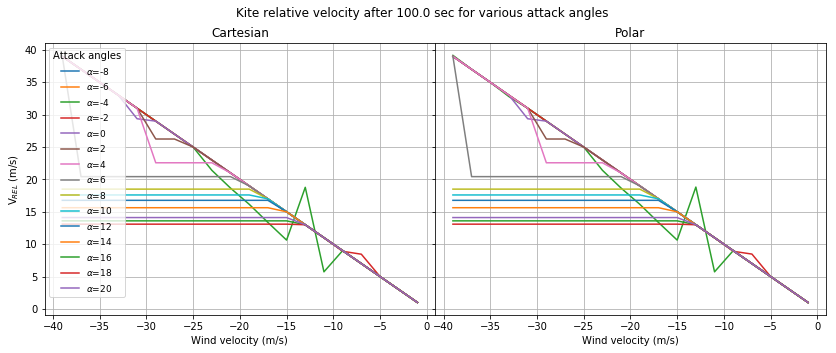

In [36]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for i, angle in enumerate(alphas): 
    
    fig.suptitle("Kite relative velocity after " + str(time) + " sec for various attack angles")
    
    wdfc = cdata.loc[cdata['Alpha'] == angle]
    axs[0].plot(wdfc['Wind_x'], wdfc['Vrelx'], label=r'$\alpha$='+str(angle))
    plt.grid(b=True)
    
    wdfs = sdata.loc[sdata['Alpha'] == angle]
    axs[1].plot(wdfs['Wind_x'], wdfs['Vrelx'], label=r'$\alpha$='+str(angle))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Attack angles', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel(r'V$_{REL}$ (m/s)')
    
    axs[0].set_title("Cartesian")
    axs[1].set_title("Polar")
    
for ax in axs.flat:
    ax.set(xlabel='Wind velocity (m/s)')
    
#plt.savefig('Images/vrel_wind_negative_pi4.png')

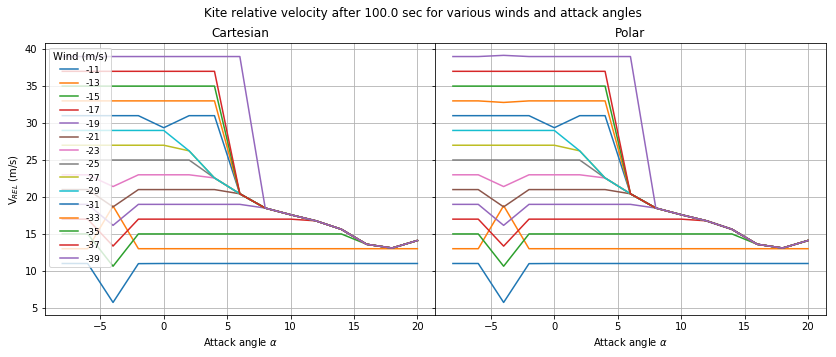

In [37]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax, step): 
    
    fig.suptitle("Kite relative velocity after " + str(time) + " sec for various winds and attack angles")
    
    wdfc = cdata.loc[cdata['Wind_x'] == float(w)]
    axs[0].plot(wdfc['Alpha'], wdfc['Vrelx'], label=str(w))
    plt.grid(b=True)
    
    wdfs = sdata.loc[sdata['Wind_x'] == float(w)]
    axs[1].plot(wdfs['Alpha'], wdfs['Vrelx'], label=str(w))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel(r'V$_{REL}$ (m/s)')
    
    axs[0].set_title("Cartesian")
    axs[1].set_title("Polar")
    
for ax in axs.flat:
    ax.set(xlabel='Attack angle ' + r'$\alpha$')
    
#plt.savefig('Images/vrel_alpha_negative_pi4.png')